# Annual Averaged Hazard Score - Drought

In this exercise we perform the calculation of the AAHS for Drought in the Natanebi river basin. 

We first load useful libraries

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as c
import xarray as xr
from wrf import (getvar, interplevel, to_np, latlon_coords, CoordPair, xy_to_ll, ll_to_xy)
from scipy.interpolate import griddata
import geopandas as gp
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


Then, we load the drought NetCDF file provided that contain the probability of exceedance for the lower, medium and high classes at a national level. 

In [2]:
d05_file = './DATA/proba_05years_return.nc'
d10_file = './DATA/proba_10years_return.nc'
d20_file = './DATA/proba_20years_return.nc'

ds05        = xr.open_dataset(d05_file)
ds10        = xr.open_dataset(d10_file)
ds20        = xr.open_dataset(d20_file)

In this case intensities are already assigned in the source file,

In [3]:
x = [2,5,10,20]
x = [1/i for i in x]

i5 = ds05.Band1*x[1]
i10 = ds10.Band1*x[2]
i20 = ds20.Band1*x[3]

A new array will contain the resulting exceedance probabilities

In [5]:
output = i5

We calculate for each pixel the corresponding exceedance probability at each return period based on the intensity levels. 

In [6]:
for jj in range(0,len(i5)):
    for ii in range(0,len(i5[0])):
        pairy = [0,i5[jj][ii].data.tolist(),i10[jj][ii].data.tolist(),i20[jj][ii].data.tolist()]
        
        output[jj][ii]=np.nansum(pairy)

We now restrict the extension to the Natanebi river basin boundaries

In [7]:
df = gp.read_file('./DATA/NataEPSG.shp')
x_min, y_min, x_max, y_max = df.total_bounds

And we plot the AAHS from our calculation method

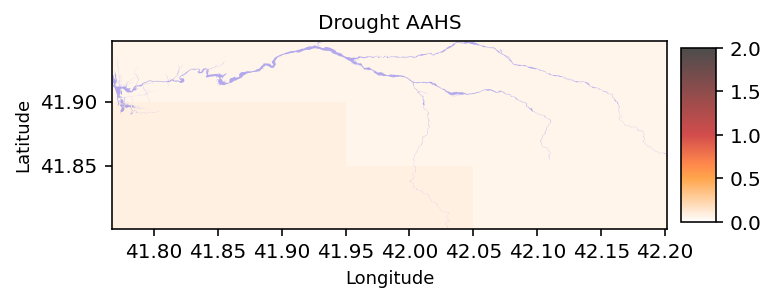

In [8]:
fig,ax = plt.subplots(dpi=144)
ax.set_ylim(y_min,y_max)
ax.set_xlim(x_min,x_max)
ax.set_title('Drought AAHS', fontsize=10,linespacing=4.2)
ax.set_xlabel('Longitude', fontsize=9,linespacing=4.2)
ax.set_ylabel('Latitude', fontsize=9)
df.plot(ax=ax, color='blue', edgecolor='none',linewidth=.2,aspect=1)
# df.plot(ax=ax, color='white', edgecolor='black',linewidth=.2,aspect=1)
cmap = plt.get_cmap('gist_heat_r')
mesh = ax.pcolormesh(output.lon.data,output.lat.data,output.data,vmin=0, vmax=2,alpha=0.7, cmap=cmap);
plt.colorbar(mesh, ax=ax, shrink=.4, pad=.02, aspect=5)
plt.show()

In [ ]:
output.to_netcdf("./OUTPUT/natanebi_AAHS_drought.nc")